In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from credentials.config import viz_output_path

In [2]:
df = pd.read_csv('../data/meta_scrape.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        77 non-null     object 
 1   year        77 non-null     int64  
 2   week_num    77 non-null     int64  
 3   album       77 non-null     object 
 4   artist      77 non-null     object 
 5   meta_score  77 non-null     int64  
 6   user_score  77 non-null     int64  
 7   crit_num    74 non-null     float64
 8   user_num    77 non-null     int64  
 9   label       72 non-null     object 
 10  genre       77 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 6.7+ KB


In [15]:
# seprete rows with nulls from df 
df_nulls = df[df.isnull().any(axis=1)]
df_not_null = df.dropna(inplace=False)

In [16]:
# clean genre lists
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 76
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          72 non-null     object  
 1   year          72 non-null     int64   
 2   week_num      72 non-null     int64   
 3   album         72 non-null     object  
 4   artist        72 non-null     object  
 5   meta_score    72 non-null     int64   
 6   user_score    72 non-null     int64   
 7   crit_num      72 non-null     float64 
 8   user_num      72 non-null     int64   
 9   label         72 non-null     object  
 10  genre         72 non-null     object  
 11  score_groups  72 non-null     category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 7.0+ KB


In [19]:
# bin by scores

bins = [0, 69, 79, 89, 100]
group_names=['mixed', '70s', '80s', '90s']
df["score_groups"] = pd.cut(df["meta_score"], bins, labels=group_names, include_lowest=True)
df.tail()

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
72,"January 7, 2022",2022,1,Transparency,Twin Atlantic,66,50,6.0,10,Believe,['Pop/Rock'],mixed
73,"January 7, 2022",2022,1,Dawn FM,The Weeknd,88,91,24.0,835,Republic,"['Pop', 'R&B', 'Contemporary R&B', 'Alternativ...",80s
74,"January 7, 2022",2022,1,Now Or Whenever,Spector,72,71,4.0,7,NaN,"['Pop/Rock', 'Indie Rock']",70s
75,"January 7, 2022",2022,1,DS4EVER,Gunna,51,53,5.0,4,300 Entertainment,"['Rap', 'Contemporary Rap']",mixed
76,"January 6, 2022",2022,1,Antidawn EP,Burial,81,64,6.0,7,Hyperdub,"['Electronic', 'Ambient', 'Pop/Rock', 'Experim...",80s


In [6]:
df.week_num.nunique()

6

<Figure size 7200x2880 with 0 Axes>

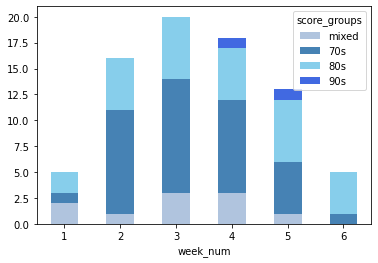

<Figure size 432x288 with 0 Axes>

In [7]:
# stacked bar chart-multi-indexed on weeknum and score groups

df_by_week_bin = df.groupby(['week_num', 'score_groups']).count().fillna(0)
plt.figure(figsize = (100,40))
df_by_week_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=360)
plt.show()
plt.savefig(viz_output_path + '\\scrape_stacked_score.png')

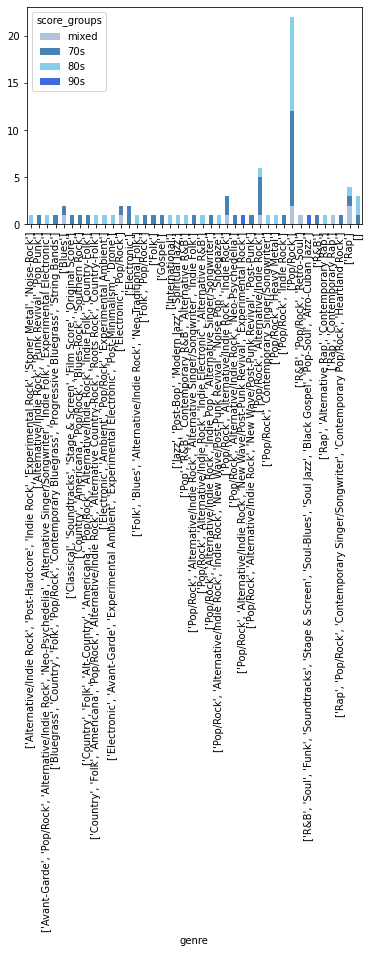

In [8]:
df_by_genre_bin = df.groupby(['genre', 'score_groups']).count().fillna(0)

df_by_genre_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=90)
plt.savefig(viz_output_path + '\\scrape_stacked_genre.png')

In [9]:
label_2plus = df['label'].value_counts().loc[lambda x : x>1]
label_2plus

Republic      3
Domino        2
Ninja Tune    2
No Quarter    2
City Slang    2
Interscope    2
Name: label, dtype: int64

In [10]:

grouped = df.groupby('label')
grouped.filter(lambda x: x['score_groups'].sum() > 1.)


TypeError: Categorical cannot perform the operation sum

In [ ]:
df.label.unique()